In [1]:
pip install pyodbc pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Conexion hacia la BD
import pyodbc
server = 'DESKTOP-SI81VPC\SQLEXPRESS'
database ='northwind'

#Cadena de Conexion
conn = (
     f'DRIVER={{SQL SERVER}};'
     f'SERVER={server};'
     f'DATABASE={database};'
)

#Intentar establecer la conexion SQL SERVER
try:
    conn = pyodbc.connect(conn)
    print("Conexion exitosa a SQL SERVER")
except Exception as e:
    print("Error al conectar a SQL SERVER:",e)

Conexion exitosa a SQL SERVER


C:\Users\Armando\AppData\Local\Temp\ipykernel_13020\1612302317.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


     CategoryName  ProductCount
0       Beverages            12
1      Condiments            12
2     Confections            13
3  Dairy Products            10
4  Grains/Cereals             7
5    Meat/Poultry             6
6         Produce             5
7         Seafood            12


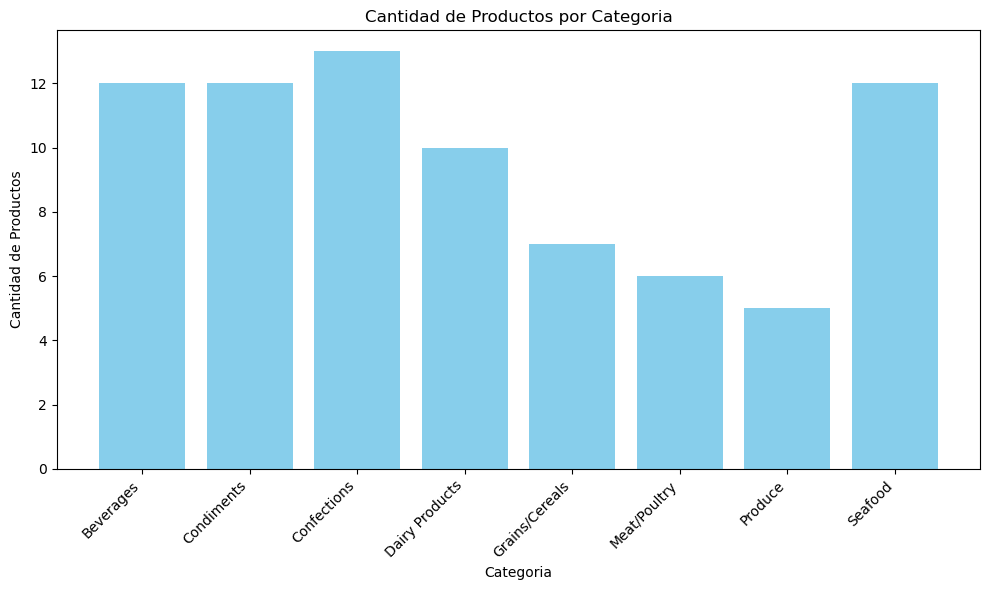

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
query = '''
    SELECT CategoryName, COUNT(ProductID) AS ProductCount
    FROM Products
    INNER JOIN Categories ON Products.CategoryID = Categories.CategoryID
    GROUP BY CategoryName
'''
#Ejecutar la consulta y cargar los resultados a un Dataframe de pandas
df = pd.read_sql(query,conn)
print(df)

#Crear el Graficos de barras con la cantidad de productos por categoria
plt.figure(figsize=(10, 6))
plt.bar(df['CategoryName'], df['ProductCount'], color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Cantidad de Productos')
plt.title('Cantidad de Productos por Categoria')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.savefig('grafico_productos_categoria.png')
plt.show()


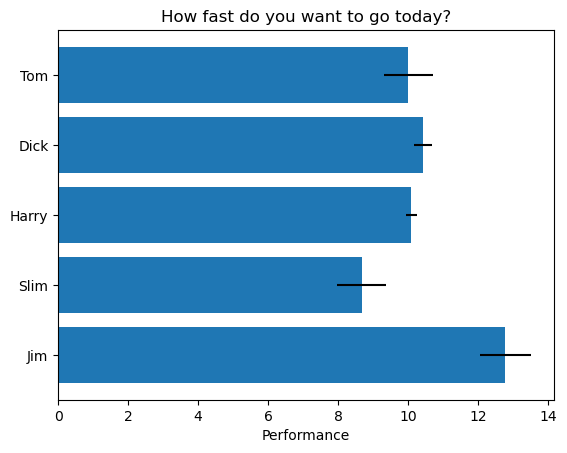

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()